MIDTERM MBAN 6110 S - DATA SCIENCE

- SUBMITTED BY: MAHIN BINDRA
- STUDENT NUMBER: 220089330

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/mahinbindra/Downloads/midterm_data.csv')

In [7]:
df.head(10)

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
5,6,57,9,36.061679,9,16,195.40,1,Desktop,Location 5
6,7,27,2,6.259057,1,14,116.28,0,Mobile,Location 2
7,8,37,8,28.509460,7,16,118.14,1,Desktop,Location 1
8,9,39,5,21.073814,7,25,175.00,0,Tablet,Location 1
9,10,54,5,28.689260,6,22,196.29,0,Desktop,Location 2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


Using the info() function to assess structural issues, we observe that
- All attributes except device and location have a complete dataset
- Device has (5000-4900) = 100 missing data points or exactly 2% missing data
- Location has (5000-4970) = 30 missing data points or exactly 0.6% missing data

In [10]:
# function to assess descriptive statistics 
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Looking at some initial descriptive statistics of the dataset, using the describe function, we notice that 
- Device has 3 unique values with 'Desktop' being the most occurred a total of 2538 times
- Location has 5 unqiue values with 'Location 4' being the most occured a total of 1056 times
- The maximum age of people interacting with the application is 65 y/o and minimum being 18 y/o
- The average number of pages a user visits is ~5, with the maximum and minimum being 1 and 12 respectively
- The average customer spends 149$ when purchasing items and the minimum a person spends is 20$

Since we don't have a lot of missing values, we can go ahead and simply drop them. However, we should first try and impute the data to maintain the integrity of the data and to assess any change in data distribution post imputation.

In [12]:
# identify null values in device and location
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [22]:
df.drop(df[df['device'].isnull() & df['location'].isnull()].index, axis=0, inplace=True)

In [13]:
df2 = df.copy()

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


In [17]:
df2.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.573915,41.542509,5.027205,25.159160,5.774355,14.965593,149.424353,0.272454,NaN,NaN
std,1443.654943,14.040833,2.595218,9.826407,2.571097,6.046672,68.705704,0.445267,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.500000,29.000000,3.000000,18.267083,4.000000,10.000000,92.465000,0.000000,NaN,NaN
50%,2501.000000,42.000000,5.000000,25.036202,6.000000,15.000000,143.340000,0.000000,NaN,NaN
75%,3750.500000,54.000000,7.000000,32.001153,8.000000,20.000000,198.330000,1.000000,NaN,NaN


In [18]:
df2.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [19]:
# impute null device values with 'other' and assess
df2['device'] = df2['device'].fillna('Other')

In [20]:
df2.groupby('device').describe()

userID                                                             
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

When comparing teh characteristics of the 'Other' with the remaining ones, it is evident the statistics are significant different. We have only 99 entries with the mean, std, median and quartiles lower than other devices. Hence, this approach is not the ideal one and we will try to fill the missing values with the mode value which is 'Desktop'

In [23]:
df3 = df.copy()

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


In [25]:
df3['device'] = df3['device'].fillna('Desktop')

In [26]:
df3.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2637.0  2478.844141  1433.266427  1.0  1259.00  2495.0  3721.00  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2637.0  41.336746  ...   196.9500  427.40          2637.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.282897  0.450492  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [27]:
df.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

Here we can see that the characteristics of Desktop do not change drastically post imputing the null values with the Desktop. Hence, it is better to impute the missing values with 'Desktop'

In [28]:
df['device'] = df['device'].fillna('Desktop')

Repeating the same process for 'Location' column i.e., first filling the characteristics with 'Other' and then 'Location 4'

In [30]:
df2['location'] = df2['location'].fillna('Other')

In [31]:
df2.groupby('location').describe()

userID                                                            
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
Other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
Other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
Other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

In [32]:
df3['location'] = df3['location'].fillna('Location 4')

In [33]:
df3.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1085.0  2504.508756  1465.947354  3.0  1221.00  2514.0  3783.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1085.0  40.976959  ...   199.4300  353.80          1085.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.283871  0.451083  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [34]:
df.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379  3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

Since the statistics after imputing missing location values with the mode, in this case 'Location 4', do not change drastically in comparison to other locations and to the original 'Location 4' stats, we will go ahead and impute the missing location values with the mode.

In [35]:
df['location'] = df['location'].fillna('Location 4')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4999 non-null   object 
 9   location         4999 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


Now that we have cleaned up the structural issues withthe dataframe and since, all continous values are complete we don't need to impute them. However, we will try to identify any outliers in the 'cart value' and 'cart items' columns.

<Axes: ylabel='cart_value'>

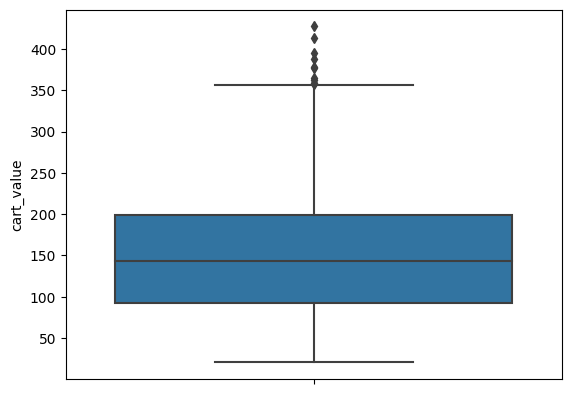

In [38]:
sns.boxplot(data = df, y='cart_value')

In [39]:
drop_cartvalue_outliers = df[df['cart_value']>400].index
drop_cartvalue_outliers

Index([2769, 3200], dtype='int64')

In [40]:
df.drop(drop_cartvalue_outliers, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4997 non-null   int64  
 1   age              4997 non-null   int64  
 2   sessions         4997 non-null   int64  
 3   time_spent       4997 non-null   float64
 4   pages_visited    4997 non-null   int64  
 5   cart_items       4997 non-null   int64  
 6   cart_value       4997 non-null   float64
 7   checkout_status  4997 non-null   int64  
 8   device           4997 non-null   object 
 9   location         4997 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.4+ KB


<Axes: ylabel='cart_items'>

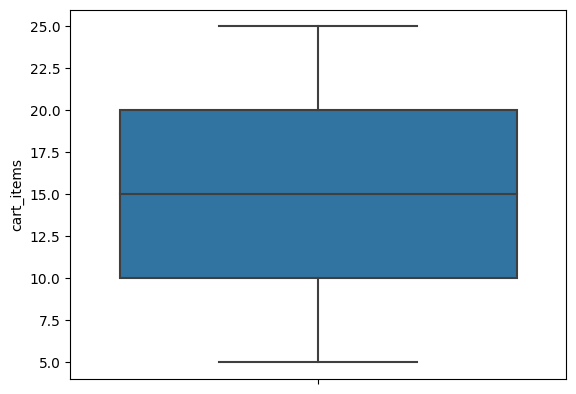

In [43]:
sns.boxplot(data = df, y='cart_items')

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4993 non-null   int64  
 1   age              4993 non-null   int64  
 2   sessions         4993 non-null   int64  
 3   time_spent       4993 non-null   float64
 4   pages_visited    4993 non-null   int64  
 5   cart_items       4993 non-null   int64  
 6   cart_value       4993 non-null   float64
 7   checkout_status  4993 non-null   int64  
 8   device           4993 non-null   object 
 9   location         4993 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.1+ KB


<Axes: xlabel='cart_value', ylabel='Count'>

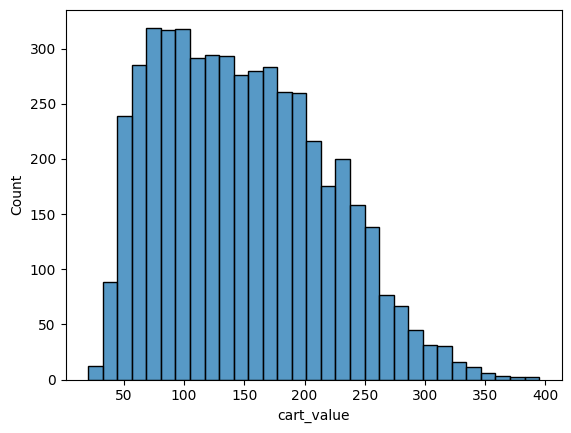

In [62]:
sns.histplot(df['cart_value'])

In [63]:
from scipy import stats
print(stats.skew(df['cart_value']))

0.4272402188210933


<Axes: xlabel='cart_items', ylabel='Count'>

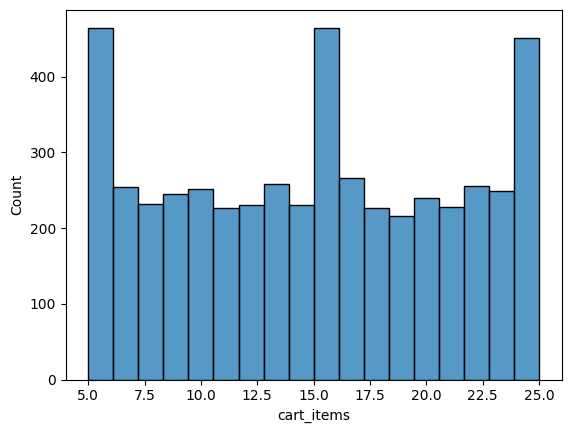

In [64]:
sns.histplot(df['cart_items'])

In [71]:
device1 = df[df['device']=='Desktop']['cart_value']
device2 = df[df['device']=='Mobile']['cart_value']
device3 = df[df['device']=='Tablet']['cart_value']

p_val = stats.f_oneway(device1, device2, device3)
print(p_val)

F_onewayResult(statistic=0.8697812604062044, pvalue=0.4191067205430872)


In [72]:
device1 = df[df['device']=='Desktop']['cart_items']
device2 = df[df['device']=='Mobile']['cart_items']
device3 = df[df['device']=='Tablet']['cart_items']

p_val = stats.f_oneway(device1, device2, device3)
print(p_val)

F_onewayResult(statistic=0.7990633039840139, pvalue=0.4498075857200732)


In [73]:
device1 = df[df['device']=='Desktop']['time_spent']
device2 = df[df['device']=='Mobile']['time_spent']
device3 = df[df['device']=='Tablet']['time_spent']

p_val = stats.f_oneway(device1, device2, device3)
print(p_val)

F_onewayResult(statistic=2.5058127480970582, pvalue=0.08171193097485016)


<Axes: xlabel='device'>

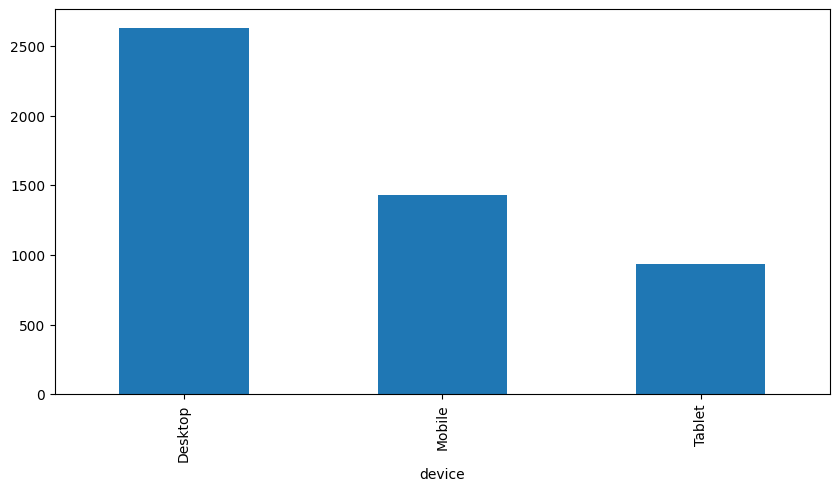

In [65]:
df.groupby('device')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [74]:
location1 = df[df['location']=='Location 1']['cart_value']
location2 = df[df['location']=='Location 2']['cart_value']
location3 = df[df['location']=='Location 3']['cart_value']
location4 = df[df['location']=='Location 4']['cart_value']
location5 = df[df['location']=='Location 5']['cart_value']


p_val = stats.f_oneway(location1, location2, location3,location4, location5 )
print(p_val)

F_onewayResult(statistic=1.1841683483084526, pvalue=0.31554274462180626)


In [75]:
location1 = df[df['location']=='Location 1']['cart_items']
location2 = df[df['location']=='Location 2']['cart_items']
location3 = df[df['location']=='Location 3']['cart_items']
location4 = df[df['location']=='Location 4']['cart_items']
location5 = df[df['location']=='Location 5']['cart_items']


p_val = stats.f_oneway(location1, location2, location3,location4, location5 )
print(p_val)

F_onewayResult(statistic=0.6804403014658841, pvalue=0.6054464406288713)


In [76]:
location1 = df[df['location']=='Location 1']['time_spent']
location2 = df[df['location']=='Location 2']['time_spent']
location3 = df[df['location']=='Location 3']['time_spent']
location4 = df[df['location']=='Location 4']['time_spent']
location5 = df[df['location']=='Location 5']['time_spent']


p_val = stats.f_oneway(location1, location2, location3,location4, location5 )
print(p_val)

F_onewayResult(statistic=0.7246271228251681, pvalue=0.57499528216074)


In [88]:
bins = [18, 26, 35, 45, 57, 65] 
labels = ['18-25', '26-34', '35-44', '45-56', '57-64']
df['Age Group'] = pd.cut(df['age'], bins = bins, labels = labels, right = False)

<Axes: xlabel='location'>

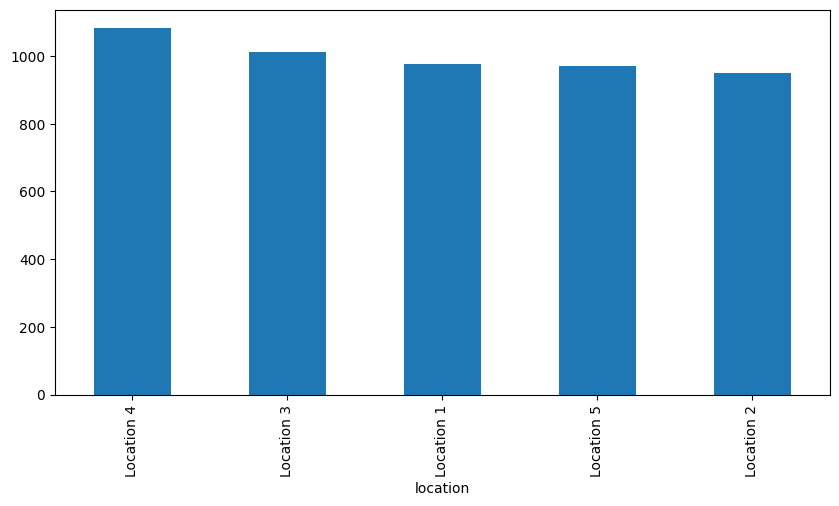

In [68]:
df.groupby('location')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

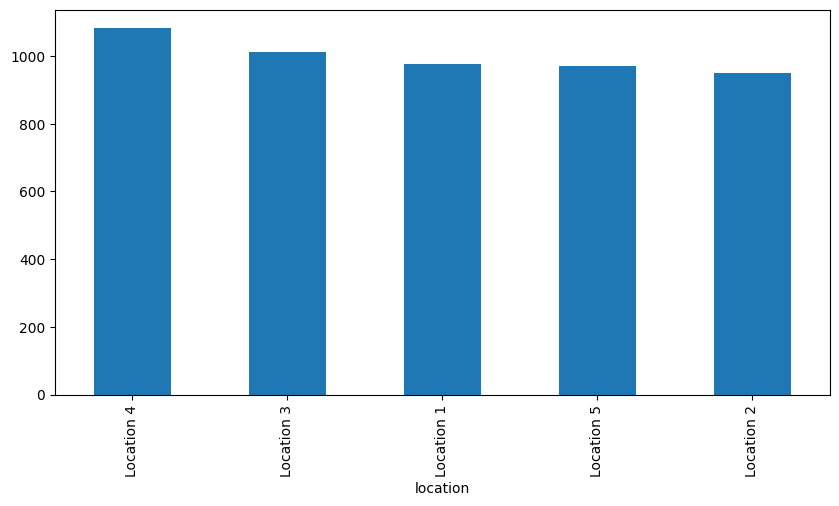

In [69]:
df.groupby('location')['cart_items'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

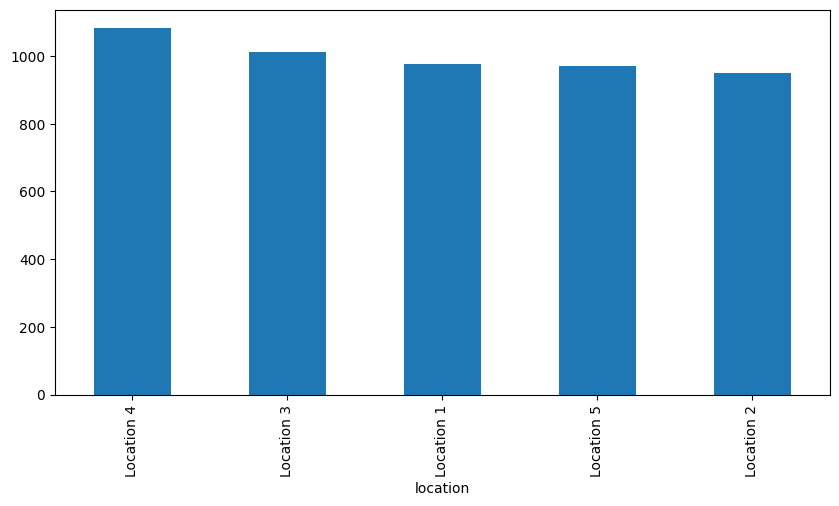

In [70]:
df.groupby('location')['time_spent'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [77]:
device1 = df[df['device']=='Desktop']['checkout_status']
device2 = df[df['device']=='Mobile']['checkout_status']
device3 = df[df['device']=='Tablet']['checkout_status']

p_val = stats.f_oneway(device1, device2, device3)
print(p_val)

F_onewayResult(statistic=1.7624782690249794, pvalue=0.1717258359246126)


In [78]:
location1 = df[df['location']=='Location 1']['checkout_status']
location2 = df[df['location']=='Location 2']['checkout_status']
location3 = df[df['location']=='Location 3']['checkout_status']
location4 = df[df['location']=='Location 4']['checkout_status']
location5 = df[df['location']=='Location 5']['checkout_status']


p_val = stats.f_oneway(location1, location2, location3,location4, location5 )
print(p_val)

F_onewayResult(statistic=0.5727654348935826, pvalue=0.682409057663947)


In [89]:
age_group_1 = df[df['Age Group'] == '18-25']['checkout_status']
age_group_2 = df[df['Age Group'] == '26-34']['checkout_status']
age_group_3 = df[df['Age Group'] == '35-44']['checkout_status']
age_group_4 = df[df['Age Group'] == '45-56']['checkout_status']
age_group_5 = df[df['Age Group'] == '57-64']['checkout_status']

p_val = stats.f_oneway(age_group_1, age_group_2, age_group_3, age_group_4, age_group_5)
print(p_val)

F_onewayResult(statistic=0.7407430459125153, pvalue=0.5640902577551046)


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4993 non-null   int64  
 1   age              4993 non-null   int64  
 2   sessions         4993 non-null   int64  
 3   time_spent       4993 non-null   float64
 4   pages_visited    4993 non-null   int64  
 5   cart_items       4993 non-null   int64  
 6   cart_value       4993 non-null   float64
 7   checkout_status  4993 non-null   int64  
 8   device           4993 non-null   object 
 9   location         4993 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.1+ KB


In [80]:
device_desktop = df[df['device']=='Desktop'].groupby('checkout_status').aggregate({'cart_value':'mean','cart_items':['sum'],'time_spent':['sum','mean']})

<Axes: xlabel='checkout_status'>

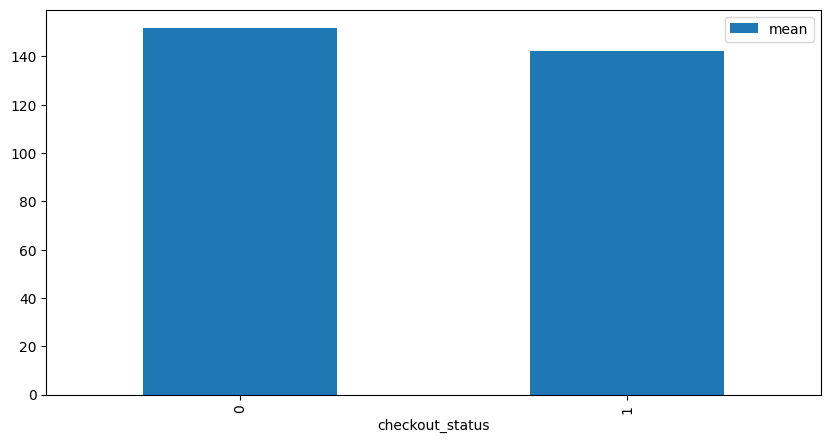

In [81]:
device_desktop['cart_value'].sort_values('mean',ascending=False).plot(kind='bar', figsize=(10,5))

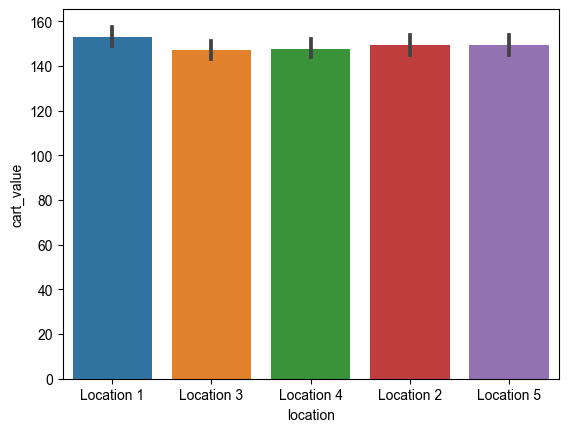

In [90]:
sns.barplot(data = df, x = 'location', y = 'cart_value')
sns.set(rc={"figure.figsize":(9, 9)})

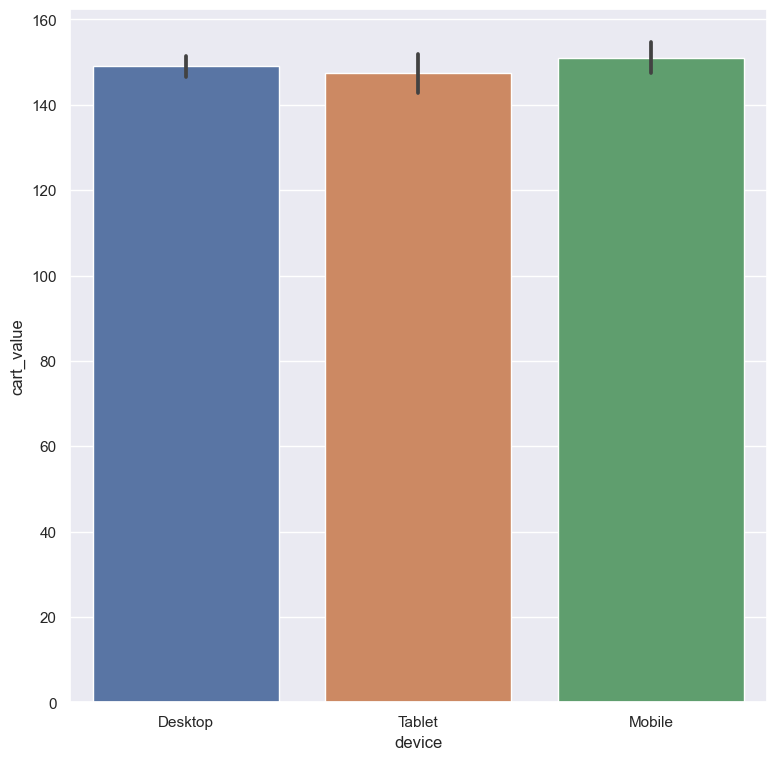

In [91]:
sns.barplot(data = df, x = 'device', y = 'cart_value')
sns.set(rc={"figure.figsize":(9, 9)})

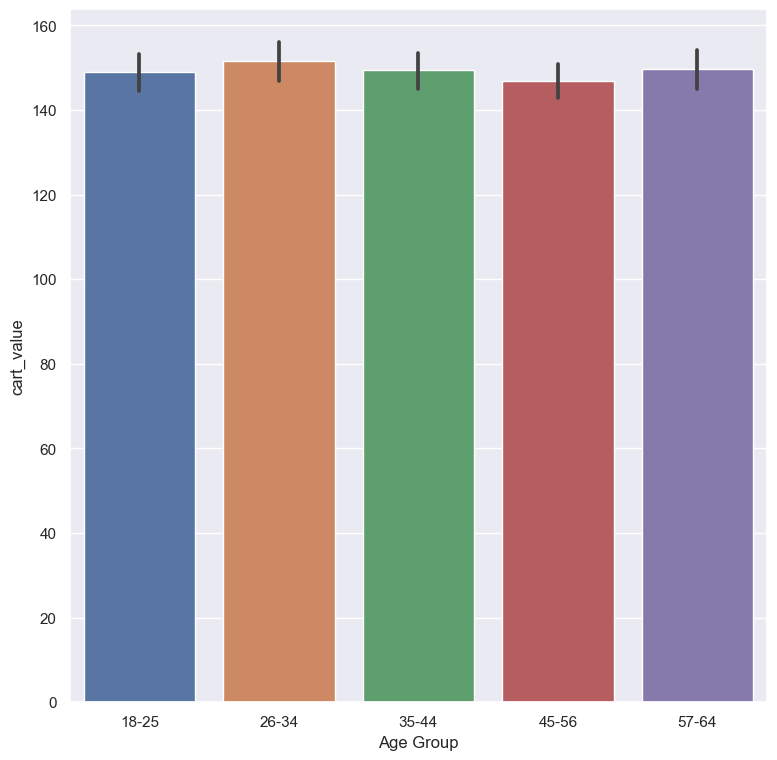

In [93]:
sns.barplot(data = df, x = 'Age Group', y = 'cart_value')
sns.set(rc={"figure.figsize":(9, 9)})

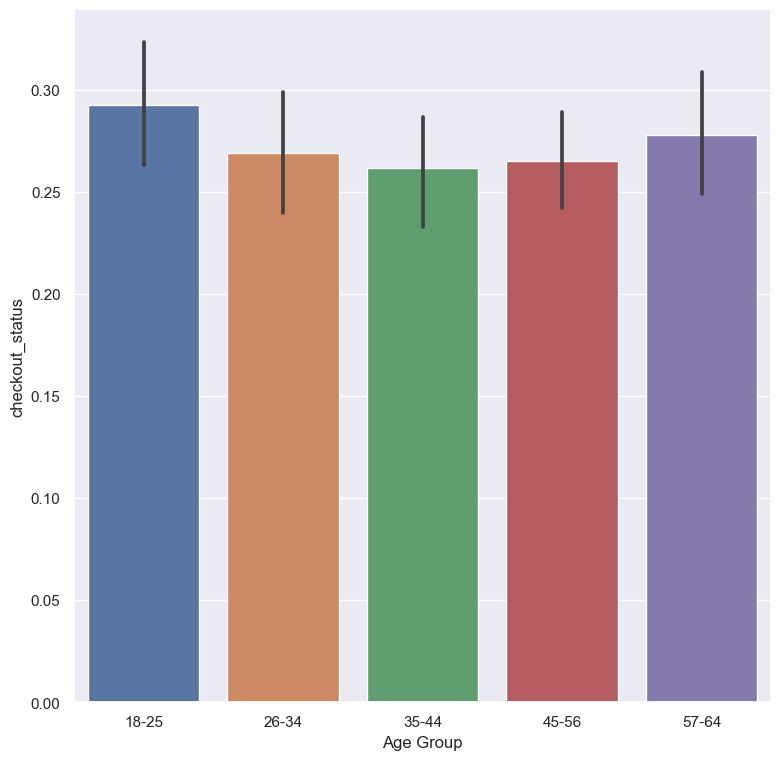

In [94]:
sns.barplot(data = df, x = 'Age Group', y = 'checkout_status')
sns.set(rc={"figure.figsize":(9, 9)})

**Q. Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?**

To assess whether user behaviour or characteristics varies by demographics, I performed statistical tests to compare the behavioral variations by age, location and device. A high p-value (>0.05) reinforces our belief that user behaviour by demographics is similar and that such demographical differences do not impact the checkout status of the user.

A high p-value(>0.05) using the ANOVA test is indicative that such behaviors do not impact the checkout status. The product team should focus on something other than these aspects when looking to improve the application to enhance the number of users who checks out, consequently reducing the number of users who do not check out even after spending enough time on the application.

**Q. How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.**

Cleaning the data is an essential step before processing and analysing it. It not only helps to enhance the data quality but also ensures that the data being analysed is consistent and reliable, thus yielding accurate results.

I took the following approach to clean the data at hand in the mentioned order:-

- **Data Assessment:** Assessed the data and its descriptive statistics using the info() and describe() function to understand the missing values, any discrepancies in the data and distribution/skewness of the dataset.

- **Identified and imputed null/missing values in 'Device' and 'Location' columns** – Imputed all the null values in the mentioned columns with the mode of the column that is 'Desktop' and 'Location 4' in the device and location columns, respectively, to maintain the integrity of the dataset and avoid dropping any extreme values. I assessed the descriptive stats before making a final call so that the imputation did not lead to any discrepancies in statistics.

- **Handled Outliers** – Detecting and removing outliers from the dataset (cart_value columns) as they can significantly deviate the data and potentially the analyses 
     - Used boxplots through the seaborn library to identify the outliers and dropped all extreme and erroneous values

- **Removed duplicate entries:** Identified and dropped all duplicate records from the dataset to avoid redundancy that may skew the analysis and ensure data integrity.

I took a systematic approach to cleaning the data. However, since the dataset contained few redundant values, we didn't require a lot of cleaning. This was the best approach as it did not lose the integrity or compromise the dataset and provided a clean dataset for analysis to extrapolate accurate and meaningful insights. 

**Q. What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).**

Although the device does not impact the cart value or time spent on the application, using the graph, it is clear that more consumers are shopping for products through their desktops. This could be attributed mainly to the comfort of the desktop or the enhanced browser website. Hence the product team should improve the tablet and mobile application to increase engagement and attract more consumers. Also, ensure they update the desktop browser regularly so as to retain customers through that medium.

From the graph between age group and cart value, we notice that people between 26-34 have a relatively high cart value. So, the product team should collaborate with the marketing team and devise strategies to help target this group and further engage them in the application. Attracting these customers can lead to higher checkout status.

The graph between age group and checkout status shows that people between 18-25 have the highest checkout status, which means that this age group is completing their orders compared to other age groups. Hence, the product team should come up with discounts and brand deals that help them promote the application to users within this age group who are not currently using this application and to maintain the ones who are already bought into the application.
 
**Since people between 35-44 have the lowest checkout status, the product team should understand the drivers and barriers of such low checkout rates. The company can survey consumers about application satisfaction and attributes leading to lower checkout, understanding unmet needs and potential expectations.**
- To effectively and accurately assess the rationale behind the low checkout rates, the company should plan to launch the survey to quality respondents, i.e., a mix of users –  users with high, low and medium checkout rates – to get a complete perspective from each class of consumers. They can do so by launching a screener survey assessing the current practices of consumers and segmenting them into the buckets mentioned above before releasing the study.
- Post-identifying drivers and barriers of this age group, the company should implement a robust advertising approach to market the key strengths of their application and uniqueness over other such competitive applications.